## PRACTICA MACHINE LEARNING PREDECIR EL PRECIO DEL AIRBNB EN UN PROBLEMA DE REGRESION LINEAL
 

In [3]:
import numpy  as np  
import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

#
Primero vamos a leer el CSV de Airbnb

In [4]:
data = pd.read_csv("C:/Users/Alejandro Osuna/Desktop/BOOTCAMP/MACHINE LEARNING/PRACTICA FINAL/airbnb-listings-extract.csv", decimal = ".", sep = ";")
print(data.shape)
data.head(8)

(14780, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
5,15695269,https://www.airbnb.com/rooms/15695269,20170407214050,2017-04-08,55. Valencia II Apartment,"Unique apartment in vibrant neighborhoods, car...",This fully refurbished apartment has 2 bedroom...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,92.0,NaN,"41.3825366724,2.14957707323","Host Has Profile Pic,Host Identity Verified,Is..."
6,1295958,https://www.airbnb.com/rooms/1295958,20170407214050,2017-04-08,3 BR + 2 baths near the beach!!,Spacious and quiet apartment that can accommod...,Its size allows to accommodate up to 6 people ...,Spacious and quiet apartment that can accommod...,none,"This unique area is rich in history, architect...",...,10.0,9.0,9.0,HUTB-0077039-0,NaN,strict,1.0,1.22,"41.3990576554,2.18422942312","Host Has Profile Pic,Is Location Exact,Require..."
7,1349311,https://www.airbnb.com/rooms/1349311,20170407214050,2017-04-08,Room & bathroom @ Sagrada Familia,"FEBRUARY 6-10, entire apartment available - 2 ...",Our apartment has been recently renovated pres...,"FEBRUARY 6-10, entire apartment available - 2 ...",none,I love arriving home from work and suddenly se...,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,0.64,"41.4023570187,2.17111908017","Host Has Profile Pic,Is Location Exact,Require..."


#
Con shape vemos cuantas columnas y filas tiene y con head sacamos las 8 primeras filas del DATAFRAME.

#
Ahora voy a dividir entre TRAIN y TEST para poder asegurar que el modelo sea evaluado de una forma justa y con datos nuevos pueda ser generalizado. Voy a dividir entre un 80% y un 20% para Train y Test respectivamente.

In [5]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("C:/Users/Alejandro Osuna/Desktop/BOOTCAMP/MACHINE LEARNING/PRACTICA FINAL/airbnb-listings-extract.csv", decimal = ".", sep = ";")
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Lo guardamos en la carpeta
train.to_csv("C:/Users/Alejandro Osuna/Desktop/BOOTCAMP/MACHINE LEARNING/PRACTICA FINAL/airbnb-listings-extract_train.csv", decimal = ".", sep = ";", index=False)
test.to_csv("C:/Users/Alejandro Osuna/Desktop/BOOTCAMP/MACHINE LEARNING/PRACTICA FINAL/airbnb-listings-extract_test.csv", decimal = ".", sep = ";", index=False)

# Ya solo trabajaremos con el dataset de Train. 
airbnb_data = pd.read_csv("C:/Users/Alejandro Osuna/Desktop/BOOTCAMP/MACHINE LEARNING/PRACTICA FINAL/airbnb-listings-extract_train.csv", decimal = ".", sep = ";")
airbnb_data.head(8)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."
5,3425435,https://www.airbnb.com/rooms/3425435,20170407214119,2017-04-08,Private room in downtown Madrid,Se trata de una habitación en piso muy luminos...,Se trata de una habitación en piso muy luminos...,Se trata de una habitación en piso muy luminos...,none,Es un barrio castizo y carismático. Orientado ...,...,10.0,10.0,10.0,NaN,NaN,strict,1.0,1.40,"40.4118798866,-3.70248065353","Host Is Superhost,Host Has Profile Pic,Host Id..."
6,10442879,https://www.airbnb.com/rooms/10442879,20170407214119,2017-04-08,Rustichic Apartment. Madrid Center.,"Apartment 2 minute walking to Sol, Mayor Squar...",El alojamiento es perfecto para una pareja que...,"Apartment 2 minute walking to Sol, Mayor Squar...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,1.61,"40.4150870948,-3.71099435105","Host Is Superhost,Host Has Profile Pic,Require..."
7,8531782,https://www.airbnb.com/rooms/8531782,20170407214119,2017-04-08,CITY CENTER CALLAO ROOM 3,"Estupendo piso de gran tamaño, totalmente refo...",Una gran opción si deseas vivir en el centro d...,"Estupendo piso de gran tamaño, totalmente refo...",none,A dos minutos de la Puerta de Sol y justo al l...,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4182655382,-3.70561688302","Host Has Profile Pic,Is Location Exact,Require..."


## Analisis exploratorio


# 
Utilizamos describe, dtypes y shape con el objetvios de analizar los datos y saber como se encuentran

In [6]:
airbnb_data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [7]:
print(airbnb_data.shape)

(11824, 89)


In [8]:
print(airbnb_data.dtypes)

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object


# 
A continuacion, con columns puedo ver de forma mas clara los datos de las columnas

In [9]:
print(airbnb_data.columns)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

#
Si observamos el DATAFRAME vemos que hay muchas columnas que no tienen datos interesantes para nuestro analisis y que su formato es STRING. Eliminaremos estas columnas para que la correlacion de la matriz sea mas sencilla y manejable.

In [10]:
airbnb_data = airbnb_data.drop([
    "Features", "Listing Url", "Scrape ID", "Last Scraped", "Description", "Name", "Summary", "Space", 
    "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules", "Thumbnail Url", 
    "Medium Url", "Picture Url", "XL Picture Url", "Host URL", "Host Name", "Host About", "Host Response Time", 
    "Host Response Rate", "Host Acceptance Rate", "Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood", 
    "Host Verifications", "Street", "Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed", 
    "Host Location", "Experiences Offered","City", "State", "Market", 
    "Smart Location", "Country Code", "Country", "Property Type", "Room Type", "Bed Type", "Calendar Update", 
    "Has Availability", "Calendar last Scraped", "First Review", "Last Review", "License", "Jurisdiction Names", 
    "Host Since", "Zipcode", "Calendar Updated", "Latitude", "Longitude", "Geolocation", 
    "Weekly Price", "Monthly Price", "Security Deposit","Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness", 
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location", 
    "Reviews per Month", "Number of Reviews","Availability 60", 
    "Availability 365", "Availability 30", "Square Feet", "Host Listings Count", "Host Total Listings", "Calculated host listings count", "Host Total Listings Count"
], axis=1, errors="ignore")

airbnb_data.head(8)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy
0,5994463,31124866,4,1.0,1.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",60.0,25.0,1,0,2,1125,52,9.0,moderate
1,14136180,85301317,4,1.0,1.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",50.0,15.0,1,0,1,1125,64,10.0,flexible
2,15520134,84213235,1,1.5,1.0,8.0,"Internet,Wireless Internet,Wheelchair accessib...",10.0,5.0,1,0,3,30,74,NaN,moderate
3,8809721,15258781,2,3.0,1.0,1.0,"Wireless Internet,Kitchen,Smoking allowed,Heat...",30.0,NaN,1,0,10,1125,36,NaN,strict
4,1162707,1706029,2,1.0,1.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",32.0,NaN,1,10,1,1125,62,9.0,strict
5,3425435,15604118,1,1.0,1.0,1.0,"TV,Internet,Wireless Internet,Wheelchair acces...",35.0,NaN,1,0,2,60,81,10.0,strict
6,10442879,2005372,4,1.0,1.0,2.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",80.0,18.0,2,21,1,3,75,10.0,flexible
7,8531782,15258781,2,3.0,1.0,1.0,"Wireless Internet,Kitchen,Smoking allowed,Elev...",25.0,14.0,1,5,10,1125,18,NaN,strict


In [11]:
print(airbnb_data.columns)

Index(['ID', 'Host ID', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Amenities', 'Price', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 90',
       'Review Scores Value', 'Cancellation Policy'],
      dtype='object')


# 
Si convertimos la columna Amenities en una variable numerica para que la matriz no me de fallos porque actualmente es de tipo String. Asi en vez de que me diga que cosas tiene me dice el numero de cosas que tiene como Amenities.

In [12]:
airbnb_data["Amenities_Number"] = airbnb_data['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

print(airbnb_data[["Amenities", "Amenities_Number"]])
airbnb_data = airbnb_data.drop(['Amenities'], axis=1, errors='ignore')

                                               Amenities  Amenities_Number
0      TV,Internet,Wireless Internet,Air conditioning...                13
1      TV,Internet,Wireless Internet,Air conditioning...                18
2      Internet,Wireless Internet,Wheelchair accessib...                25
3      Wireless Internet,Kitchen,Smoking allowed,Heat...                 5
4      TV,Cable TV,Internet,Wireless Internet,Air con...                15
...                                                  ...               ...
11819  TV,Internet,Wireless Internet,Kitchen,Breakfas...                17
11820  TV,Internet,Wireless Internet,Air conditioning...                13
11821  TV,Internet,Wireless Internet,Air conditioning...                18
11822  TV,Cable TV,Wireless Internet,Kitchen,Buzzer/w...                19
11823  TV,Internet,Wireless Internet,Kitchen,Doorman,...                15

[11824 rows x 2 columns]


# 
Aqui podemos observar como quedaria

In [13]:
airbnb_data.head(8)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy,Amenities_Number
0,5994463,31124866,4,1.0,1.0,2.0,60.0,25.0,1,0,2,1125,52,9.0,moderate,13
1,14136180,85301317,4,1.0,1.0,2.0,50.0,15.0,1,0,1,1125,64,10.0,flexible,18
2,15520134,84213235,1,1.5,1.0,8.0,10.0,5.0,1,0,3,30,74,NaN,moderate,25
3,8809721,15258781,2,3.0,1.0,1.0,30.0,NaN,1,0,10,1125,36,NaN,strict,5
4,1162707,1706029,2,1.0,1.0,1.0,32.0,NaN,1,10,1,1125,62,9.0,strict,15
5,3425435,15604118,1,1.0,1.0,1.0,35.0,NaN,1,0,2,60,81,10.0,strict,15
6,10442879,2005372,4,1.0,1.0,2.0,80.0,18.0,2,21,1,3,75,10.0,flexible,20
7,8531782,15258781,2,3.0,1.0,1.0,25.0,14.0,1,5,10,1125,18,NaN,strict,12


# 
El siguiente paso seria ver las columnas con NAN y vemos cuantos son o el porcentaje y con ello los eliminamos o sustituimos.


In [14]:
print(airbnb_data.isnull().any()[airbnb_data.isnull().any()])

Bathrooms              True
Bedrooms               True
Beds                   True
Price                  True
Cleaning Fee           True
Review Scores Value    True
dtype: bool


In [15]:
null_porcentaje = airbnb_data.isnull().mean() * 100
null_porcentaje_sorted = null_porcentaje.sort_values(ascending=False)

print(null_porcentaje_sorted)

Cleaning Fee           41.018268
Review Scores Value    22.767253
Bathrooms               0.372124
Beds                    0.312923
Bedrooms                0.169147
Price                   0.126861
ID                      0.000000
Accommodates            0.000000
Host ID                 0.000000
Guests Included         0.000000
Minimum Nights          0.000000
Extra People            0.000000
Maximum Nights          0.000000
Availability 90         0.000000
Cancellation Policy     0.000000
Amenities_Number        0.000000
dtype: float64


Lo que voy hacer con la columna Vleaning Fee es que si tiene un precio de 0 o NAN voy a poner 0 y si tiene un precio distinto a esos dos valores le pongo 1. Con ello puedo operar mejor y decir si tiene servicio de limpieza o no.

In [16]:
# Creamos la columna 'Has_Cleaning_Fee' con valor 1 si  'Cleaning Fee' no es NaN ni 0
airbnb_data['Has_Cleaning_Fee'] = airbnb_data['Cleaning Fee'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)

# Creamos la columna 'Cleaning_Fee_Amount' con el valor de 'Cleaning Fee' o 0 si no hay
airbnb_data['Cleaning_Fee_Amount'] = airbnb_data['Cleaning Fee'].apply(lambda x: x if pd.notna(x) and x > 0 else 0)

airbnb_data = airbnb_data.drop(['Cleaning Fee'], axis=1)

# Ver el resultado
print(airbnb_data[['Has_Cleaning_Fee', 'Cleaning_Fee_Amount']].head())

   Has_Cleaning_Fee  Cleaning_Fee_Amount
0                 1                 25.0
1                 1                 15.0
2                 1                  5.0
3                 0                  0.0
4                 0                  0.0


# 
Utilizo un OneHotEncoder para dividir la columna Cancellation Policy en varias columnas que indican si hay politica de cancelacion o no y si es estricta, flexible o moderada. 
Esto lo añado a la matriz de correlacion y podemos hacer el analisis.

In [17]:
from sklearn.preprocessing import OneHotEncoder



In [18]:
encoder = OneHotEncoder(sparse_output=False)
encoded_values = encoder.fit_transform(airbnb_data[['Cancellation Policy']])
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Cancellation Policy']))
airbnb_data = pd.concat([airbnb_data, encoded_df], axis=1)

airbnb_data = airbnb_data.drop(['Cancellation Policy'], axis=1)

print(airbnb_data.head())

         ID   Host ID  Accommodates  Bathrooms  Bedrooms  Beds  Price  \
0   5994463  31124866             4        1.0       1.0   2.0   60.0   
1  14136180  85301317             4        1.0       1.0   2.0   50.0   
2  15520134  84213235             1        1.5       1.0   8.0   10.0   
3   8809721  15258781             2        3.0       1.0   1.0   30.0   
4   1162707   1706029             2        1.0       1.0   1.0   32.0   

   Guests Included  Extra People  Minimum Nights  ...  Has_Cleaning_Fee  \
0                1             0               2  ...                 1   
1                1             0               1  ...                 1   
2                1             0               3  ...                 1   
3                1             0              10  ...                 0   
4                1            10               1  ...                 0   

   Cleaning_Fee_Amount  Cancellation Policy_flexible  \
0                 25.0                           0.0  

Sustituyo los NAN que hay en las columnas "Bathrooms", "Bedrooms", "Review Scores Value", "Beds"

In [19]:
columns_to_fill = ["Bathrooms", "Bedrooms", "Review Scores Value", "Beds"]

for column in columns_to_fill:
    mode_value = airbnb_data[column].mode()[0]
    airbnb_data[column].fillna(mode_value, inplace=True)
    
airbnb_data.head(8)

C:\Users\Alejandro Osuna\AppData\Local\Temp\ipykernel_9880\233811523.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_data[column].fillna(mode_value, inplace=True)


,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,...,Has_Cleaning_Fee,Cleaning_Fee_Amount,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,5994463,31124866,4,1.0,1.0,2.0,60.0,1,0,2,...,1,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,14136180,85301317,4,1.0,1.0,2.0,50.0,1,0,1,...,1,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15520134,84213235,1,1.5,1.0,8.0,10.0,1,0,3,...,1,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8809721,15258781,2,3.0,1.0,1.0,30.0,1,0,10,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1162707,1706029,2,1.0,1.0,1.0,32.0,1,10,1,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,3425435,15604118,1,1.0,1.0,1.0,35.0,1,0,2,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,10442879,2005372,4,1.0,1.0,2.0,80.0,2,21,1,...,1,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8531782,15258781,2,3.0,1.0,1.0,25.0,1,5,10,...,1,14.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Volvemos a ver si hay algun valor NUN, ya que no quiero que tenga ninguno para operar

In [20]:
print(airbnb_data.isnull().any())

ID                                     False
Host ID                                False
Accommodates                           False
Bathrooms                              False
Bedrooms                               False
Beds                                   False
Price                                   True
Guests Included                        False
Extra People                           False
Minimum Nights                         False
Maximum Nights                         False
Availability 90                        False
Review Scores Value                    False
Amenities_Number                       False
Has_Cleaning_Fee                       False
Cleaning_Fee_Amount                    False
Cancellation Policy_flexible           False
Cancellation Policy_flexible_new       False
Cancellation Policy_moderate           False
Cancellation Policy_moderate_new       False
Cancellation Policy_strict             False
Cancellation Policy_strict_new         False
Cancellati

Es verdad que Precio aparece el valor NUN pero como hemos calculado anteriormente en los porcentajes de NUN, la variable "Price" tenia un porcentaje muy pequeño, pero como es la variable que quiero predecir no me interesa que tenga valores nulos, por lo que las filas que tengan el valor NUN las voy a eliminar ya que considero que no es objetivo o pueden ser errores.

In [21]:
airbnb_data = airbnb_data.dropna(subset=['Price'])

print(airbnb_data[['Price']].head())

   Price
0   60.0
1   50.0
2   10.0
3   30.0
4   32.0


In [22]:
print(airbnb_data.isnull().any())

ID                                     False
Host ID                                False
Accommodates                           False
Bathrooms                              False
Bedrooms                               False
Beds                                   False
Price                                  False
Guests Included                        False
Extra People                           False
Minimum Nights                         False
Maximum Nights                         False
Availability 90                        False
Review Scores Value                    False
Amenities_Number                       False
Has_Cleaning_Fee                       False
Cleaning_Fee_Amount                    False
Cancellation Policy_flexible           False
Cancellation Policy_flexible_new       False
Cancellation Policy_moderate           False
Cancellation Policy_moderate_new       False
Cancellation Policy_strict             False
Cancellation Policy_strict_new         False
Cancellati

Ahora ya vemos que no queda ningun valor, por lo que podemos empezar con la matriz de correlacion.

In [23]:
airbnb_data.corr()

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,...,Has_Cleaning_Fee,Cleaning_Fee_Amount,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
ID,1.000000,0.613361,-0.090796,-0.062064,-0.062505,-0.098329,-0.040946,-0.089272,-0.101849,-0.039711,...,-0.021869,-0.057651,0.169913,0.004455,-0.060578,-0.028534,-0.104741,-0.032319,0.049320,0.000680
Host ID,0.613361,1.000000,-0.099768,-0.056380,-0.075051,-0.074013,-0.052158,-0.079544,-0.089944,-0.031662,...,-0.118926,-0.142751,0.181101,0.001188,-0.051696,-0.023282,-0.125101,-0.020915,0.074977,-0.020192
Accommodates,-0.090796,-0.099768,1.000000,0.428245,0.721047,0.835636,0.528380,0.565060,0.251381,0.006699,...,0.194892,0.343448,-0.223678,0.016438,-0.003979,0.001117,0.210675,0.001443,0.027109,0.034604
Bathrooms,-0.062064,-0.056380,0.428245,1.000000,0.516660,0.470689,0.378409,0.240117,0.083515,0.030449,...,0.007643,0.197506,-0.092458,0.016744,-0.098517,-0.010176,0.172978,0.006417,0.014199,0.049085
Bedrooms,-0.062505,-0.075051,0.721047,0.516660,1.000000,0.725291,0.492313,0.435339,0.132868,0.020766,...,0.089726,0.299375,-0.096247,0.007240,-0.049744,-0.007606,0.132606,0.006983,0.010378,0.043401
Beds,-0.098329,-0.074013,0.835636,0.470689,0.725291,1.000000,0.437660,0.456701,0.186302,0.007440,...,0.096846,0.266358,-0.150797,0.010171,-0.023341,0.001638,0.161518,0.003851,0.003128,0.029043
Price,-0.040946,-0.052158,0.528380,0.378409,0.492313,0.437660,1.000000,0.296850,0.104672,0.029632,...,0.075488,0.431278,-0.090656,0.007371,-0.076211,0.001702,0.147543,0.021247,0.011753,0.064108
Guests Included,-0.089272,-0.079544,0.565060,0.240117,0.435339,0.456701,0.296850,1.000000,0.358659,0.003170,...,0.225805,0.261092,-0.187230,0.016500,0.026317,-0.006493,0.152524,-0.009360,0.013807,0.013150
Extra People,-0.101849,-0.089944,0.251381,0.083515,0.132868,0.186302,0.104672,0.358659,1.000000,-0.019904,...,0.202798,0.176034,-0.160879,0.012527,0.036607,0.014580,0.104018,-0.008551,0.166008,0.018131
Minimum Nights,-0.039711,-0.031662,0.006699,0.030449,0.020766,0.007440,0.029632,0.003170,-0.019904,1.000000,...,0.016569,0.076430,-0.027004,-0.002173,-0.014244,0.000002,0.039992,-0.002418,-0.005631,-0.001770


In [24]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


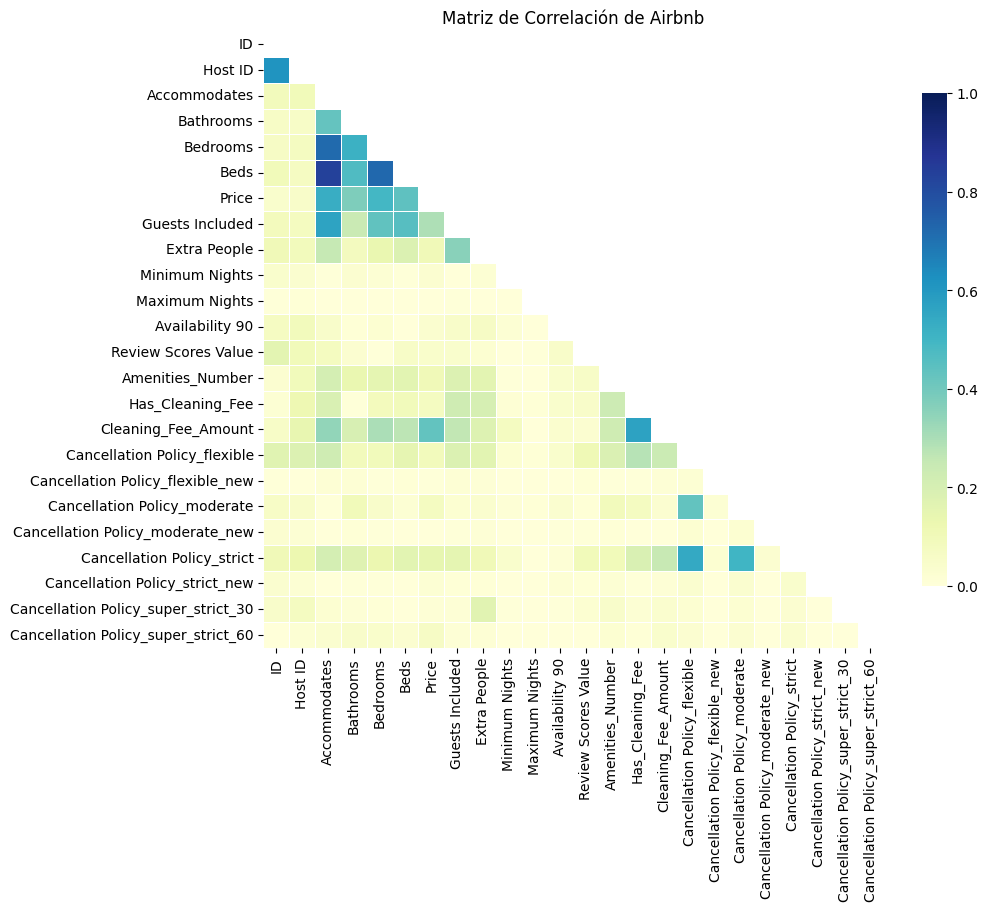

In [25]:
import seaborn as sns

corr = np.abs(airbnb_data.corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            annot=False, linewidths=0.5, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.title("Matriz de Correlación de Airbnb")
plt.show()

Voy a calcular que variables tiene una correlacion con el precio de al menos un 10%

In [26]:
correlation_matrix = airbnb_data.corr()

variables_with_corr = correlation_matrix['Price'][abs(correlation_matrix['Price']) > 0.1].index.tolist()

variables_with_corr.remove('Price')

variables_with_corr

['Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Guests Included',
 'Extra People',
 'Amenities_Number',
 'Cleaning_Fee_Amount',
 'Cancellation Policy_strict']

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(airbnb_data[variables_with_corr]) 

StandardScaler()

He utilziado el Scaler para transformar los datos con el train, por lo que esto tambien lo aplica al test.
Utilizando la validacion cruzada y Hperopt haremos una optimizacion de los hiperparametros.

In [32]:
pip install hyperopt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 5.2/150.0 MB 30.1 MB/s eta 0:00:05
   --- ------------------------------------ 12.3/150.0 MB 32.3 MB/s eta 0:00:05
   ----- ---------------------------------- 20.2/150.0 MB 34.1 MB/s eta 0:00:04
   ------- -------------------------------- 28.3/150.0 MB 35.2 MB/s eta 0:00:04
   --------- ------------------------------ 36.4/150.0 MB 35.8 MB/s eta 0:00:04
   ----------- ---------------------------- 44.6/150.0 MB 36.3 MB/s eta 0:00:03
   -------------- ------------------------- 52.7/150.0 MB 36.6 MB/s eta 0:00:03
   ---------------- ----------------------- 60.6/150.0 MB 36.8 MB/s eta 0:00:03
   ------------------ --------------------- 68.7/150.0 MB 37.1 MB/s eta 0:00:03
   -------------------- ------------------- 76.5/150.0 MB 37.1 MB/s eta 0:00:02
   ---------------------- ----------------- 84.1/150.0 MB 37.3 MB/s eta 0:00:02
   ------------------------ --------------- 91.2/1


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


X = airbnb_data[variables_with_corr]  
y = airbnb_data['Price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


space = hp.choice('regressors', [
    {
        'model': RandomForestRegressor,
        'params': {
            'n_estimators': hp.choice('rf.n_estimators', range(100, 1001, 100)),
            'max_depth': hp.choice('rf.max_depth', [None] + list(range(5, 31))),
            'min_samples_split': hp.choice('rf.min_samples_split', range(2, 20)),
            'min_samples_leaf': hp.choice('rf.min_samples_leaf', range(1, 20)),
            'bootstrap': hp.choice('rf.bootstrap', [True, False]),
            'max_features': hp.uniform('rf.max_features', 0.3, 0.7)
        }
    },
    {
        'model': KNeighborsRegressor,
        'params': {
            'n_neighbors': hp.choice('knn.n_neighbors', range(1, 21)),
            'weights': hp.choice('knn.weights', ['uniform', 'distance']),
            'algorithm': hp.choice('knn.algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
            'leaf_size': hp.choice('knn.leaf_size', range(10, 60, 5)),
            'p': hp.choice('knn.p', [1, 2]),
        }
    },
    {
        'model': XGBRegressor,
        'params': {
            'objective': 'reg:squarederror',
            'max_depth': hp.choice('xgb.max_depth', range(3, 16)),
            'n_estimators': hp.choice('xgb.n_estimators', range(100, 1001, 50)),
            'learning_rate': hp.loguniform('xgb.learning_rate', np.log(0.01), np.log(0.2)),
            'gamma': hp.uniform('xgb.gamma', 0, 5),
            'min_child_weight': hp.choice('xgb.min_child_weight', range(1, 11)),
            'subsample': hp.uniform('xgb.subsample', 0.5, 1),
            'colsample_bytree': hp.uniform('xgb.colsample_bytree', 0.5, 1),
            'reg_lambda': hp.uniform('xgb.reg_lambda', 0, 1),
            'reg_alpha': hp.uniform('xgb.reg_alpha', 0, 1)
        }
    },
    {
        'model': Lasso,
        'params': {
            'alpha': hp.loguniform('lasso.alpha', np.log(0.001), np.log(10)),
            'max_iter': hp.choice('lasso.max_iter', [1000, 2000, 5000]),
            'tol': hp.uniform('lasso.tol', 1e-4, 1e-2)
        }
    },
    {
        'model': LinearRegression,
        'params': {}
    }
])


def objective(params):
    Model = params['model']
    model_params = params['params']

    
    model = Model(**model_params)

    
    if Model == Lasso:
        model = make_pipeline(StandardScaler(), model)

    
    scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)

    
    return {'loss': -scores.mean(), 'status': STATUS_OK}


trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)


best_space = space_eval(space, best)
best_model = best_space['model']
best_params = best_space['params']


final_model = best_model(**best_params)


if best_model == Lasso:
    final_model = make_pipeline(StandardScaler(), final_model)

final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor modelo: {best_model.__name__}")
print(f"Mejores parámetros: {best_params}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")


joblib.dump(final_model, 'mejor_modelo_airbnb.pkl')

100%|██████████| 100/100 [06:45<00:00,  4.06s/trial, best loss: 46.26157858087008]
Mejor modelo: XGBRegressor
Mejores parámetros: {'colsample_bytree': 0.8731811540393866, 'gamma': 2.2067516792256137, 'learning_rate': 0.010222118985396092, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 650, 'objective': 'reg:squarederror', 'reg_alpha': 0.8297260051960395, 'reg_lambda': 0.013521744336878694, 'subsample': 0.8626723393546272}
RMSE: 45.64421131230166
MAE: 23.18476571095989
R2: 0.5822515844034799


['mejor_modelo_airbnb.pkl']

Ahora lo realizamos con TEST

In [39]:
airbnb_data_test = pd.read_csv("C:/Users/Alejandro Osuna/Desktop/BOOTCAMP/MACHINE LEARNING/PRACTICA FINAL/airbnb-listings-extract.csv", decimal = ".", sep = ";")

In [40]:
airbnb_data_test = airbnb_data_test.drop([
    "Features", "Listing Url", "Scrape ID", "Last Scraped", "Description", "Name", "Summary", "Space", 
    "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules", "Thumbnail Url", 
    "Medium Url", "Picture Url", "XL Picture Url", "Host URL", "Host Name", "Host About", "Host Response Time", 
    "Host Response Rate", "Host Acceptance Rate", "Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood", 
    "Host Verifications", "Street", "Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed", 
    "Host Location", "Experiences Offered","City", "State", "Market", 
    "Smart Location", "Country Code", "Country", "Property Type", "Room Type", "Bed Type", "Calendar Update", 
    "Has Availability", "Calendar last Scraped", "First Review", "Last Review", "License", "Jurisdiction Names", 
    "Host Since", "Zipcode", "Calendar Updated", "Latitude", "Longitude", "Geolocation", 
    "Weekly Price", "Monthly Price", "Security Deposit","Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness", 
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location", 
    "Reviews per Month", "Number of Reviews","Availability 60", 
    "Availability 365", "Availability 30", "Square Feet", "Host Listings Count", "Host Total Listings", "Calculated host listings count", "Host Total Listings Count"
], axis=1, errors="ignore")

airbnb_data_test.head(8)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy
0,11210388,58386783,2,1.0,1.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",58.0,NaN,1,0,2,1125,64,10.0,moderate
1,17471131,102947901,4,1.0,1.0,1.0,"Wireless Internet,Air conditioning,Elevator in...",70.0,40.0,2,44,1,1125,39,10.0,super_strict_30
2,17584891,102947901,4,1.0,1.0,1.0,"Wireless Internet,Air conditioning,Elevator in...",70.0,60.0,2,42,1,1125,42,NaN,super_strict_30
3,5398030,131794,8,2.0,3.0,4.0,"TV,Internet,Wireless Internet,Air conditioning...",229.0,79.0,2,39,2,1125,47,9.0,strict
4,18104606,54310958,5,1.0,2.0,2.0,"TV,Wireless Internet,Air conditioning,Kitchen,...",149.0,55.0,1,0,2,1125,0,NaN,flexible
5,15695269,54310958,6,1.0,2.0,3.0,"TV,Wireless Internet,Air conditioning,Kitchen,...",106.0,NaN,1,0,2,1125,2,NaN,strict
6,1295958,7047484,5,2.0,3.0,4.0,"TV,Internet,Wireless Internet,Air conditioning...",52.0,60.0,4,25,3,365,23,9.0,strict
7,1349311,2839207,2,1.0,1.0,1.0,"TV,Internet,Wireless Internet,Air conditioning...",45.0,30.0,1,20,3,7,66,10.0,flexible


In [41]:
airbnb_data_test["Amenities_Count"] = airbnb_data_test['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

print(airbnb_data_test[["Amenities", "Amenities_Count"]])

                                               Amenities  Amenities_Count
0      TV,Cable TV,Internet,Wireless Internet,Air con...               23
1      Wireless Internet,Air conditioning,Elevator in...                7
2      Wireless Internet,Air conditioning,Elevator in...                7
3      TV,Internet,Wireless Internet,Air conditioning...               24
4      TV,Wireless Internet,Air conditioning,Kitchen,...               12
...                                                  ...              ...
14775  TV,Cable TV,Internet,Wireless Internet,Air con...               11
14776  TV,Wireless Internet,Kitchen,Breakfast,Elevato...               11
14777  TV,Cable TV,Internet,Wireless Internet,Air con...               17
14778  Internet,Wireless Internet,Kitchen,Heating,Was...               18
14779  TV,Cable TV,Internet,Wireless Internet,Air Con...               21

[14780 rows x 2 columns]


In [42]:
columns_to_fill = ["Bathrooms", "Bedrooms", "Review Scores Value", "Beds"]

for column in columns_to_fill:
    mode_value = airbnb_data_test[column].mode()[0]
    airbnb_data_test[column].fillna(mode_value, inplace=True)
    
airbnb_data_test.head(5)

C:\Users\Alejandro Osuna\AppData\Local\Temp\ipykernel_9880\3355042562.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_data_test[column].fillna(mode_value, inplace=True)


,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy,Amenities_Count
0,11210388,58386783,2,1.0,1.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",58.0,NaN,1,0,2,1125,64,10.0,moderate,23
1,17471131,102947901,4,1.0,1.0,1.0,"Wireless Internet,Air conditioning,Elevator in...",70.0,40.0,2,44,1,1125,39,10.0,super_strict_30,7
2,17584891,102947901,4,1.0,1.0,1.0,"Wireless Internet,Air conditioning,Elevator in...",70.0,60.0,2,42,1,1125,42,10.0,super_strict_30,7
3,5398030,131794,8,2.0,3.0,4.0,"TV,Internet,Wireless Internet,Air conditioning...",229.0,79.0,2,39,2,1125,47,9.0,strict,24
4,18104606,54310958,5,1.0,2.0,2.0,"TV,Wireless Internet,Air conditioning,Kitchen,...",149.0,55.0,1,0,2,1125,0,10.0,flexible,12


In [43]:
airbnb_data_test = airbnb_data_test.drop(['Amenities'], axis=1, errors='ignore')
airbnb_data_test.head(5)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy,Amenities_Count
0,11210388,58386783,2,1.0,1.0,1.0,58.0,NaN,1,0,2,1125,64,10.0,moderate,23
1,17471131,102947901,4,1.0,1.0,1.0,70.0,40.0,2,44,1,1125,39,10.0,super_strict_30,7
2,17584891,102947901,4,1.0,1.0,1.0,70.0,60.0,2,42,1,1125,42,10.0,super_strict_30,7
3,5398030,131794,8,2.0,3.0,4.0,229.0,79.0,2,39,2,1125,47,9.0,strict,24
4,18104606,54310958,5,1.0,2.0,2.0,149.0,55.0,1,0,2,1125,0,10.0,flexible,12


In [ ]:
# Creamos la columna 'Has_Cleaning_Fee' con valor 1 si  'Cleaning Fee' no es NaN ni 0
airbnb_data_test['Has_Cleaning_Fee'] = airbnb_data_test['Cleaning Fee'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)

# Creamos la columna 'Cleaning_Fee_Amount' con el valor de 'Cleaning Fee' o 0 si no hay
airbnb_data_test['Cleaning_Fee_Amount'] = airbnb_data_test['Cleaning Fee'].apply(lambda x: x if pd.notna(x) and x > 0 else 0)

airbnb_data_test = airbnb_data_test.drop(['Cleaning Fee'], axis=1)

# Ver el resultado
print(airbnb_data_test[['Has_Cleaning_Fee', 'Cleaning_Fee_Amount']].head())

   Has_Cleaning_Fee  Cleaning_Fee_Amount
0                 0                  0.0
1                 1                 40.0
2                 1                 60.0
3                 1                 79.0
4                 1                 55.0


In [51]:
# Objeto OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustamos y transformamos la columna 'Cancellation Policy'
encoded_values = encoder.fit_transform(airbnb_data_test[['Cancellation Policy']])

# Creamos un DataFrame con las columnas resultantes
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Cancellation Policy']))

# Concatenamos el DataFrame original con las nuevas columnas generadas
airbnb_data_test = pd.concat([airbnb_data_test, encoded_df], axis=1)

# Ahora podemos borrar la columna original 'Cancellation Policy' si ya no la necesitamos
airbnb_data_test = airbnb_data_test.drop(['Cancellation Policy'], axis=1)


In [52]:
airbnb_data_test = airbnb_data_test.dropna(subset=['Price'])

In [53]:
airbnb_data_test.head(8)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,...,Has_Cleaning_Fee,Cleaning_Fee_Amount,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,11210388,58386783,2,1.0,1.0,1.0,58.0,1,0,2,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,17471131,102947901,4,1.0,1.0,1.0,70.0,2,44,1,...,1,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17584891,102947901,4,1.0,1.0,1.0,70.0,2,42,1,...,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5398030,131794,8,2.0,3.0,4.0,229.0,2,39,2,...,1,79.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,18104606,54310958,5,1.0,2.0,2.0,149.0,1,0,2,...,1,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15695269,54310958,6,1.0,2.0,3.0,106.0,1,0,2,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1295958,7047484,5,2.0,3.0,4.0,52.0,4,25,3,...,1,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1349311,2839207,2,1.0,1.0,1.0,45.0,1,20,3,...,1,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
print(airbnb_data_test.isnull().any())

ID                                     False
Host ID                                False
Accommodates                           False
Bathrooms                              False
Bedrooms                               False
Beds                                   False
Price                                  False
Guests Included                        False
Extra People                           False
Minimum Nights                         False
Maximum Nights                         False
Availability 90                        False
Review Scores Value                    False
Amenities_Count                        False
Has_Cleaning_Fee                       False
Cleaning_Fee_Amount                    False
Cancellation Policy_flexible           False
Cancellation Policy_flexible_new       False
Cancellation Policy_moderate           False
Cancellation Policy_moderate_new       False
Cancellation Policy_strict             False
Cancellation Policy_strict_new         False
Cancellati

In [ ]:

loaded_model = joblib.load('mejor_modelo_airbnb.pkl')


y_pred = loaded_model.predict(X_test)


mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Test Mean Absolute Error (MAE): {mae_test}")
print(f"Test R-squared (R2): {r2_test}")


Test Mean Squared Error (MSE): 2083.3940263220466
Test Mean Absolute Error (MAE): 23.18476571095989
Test R-squared (R2): 0.5822515844034799


## Análisis de resultados en entrenamiento y prueba:
RMSE (Raíz del Error Cuadrático Medio):

Entrenamiento: 45.64

Prueba: 45.64
La coincidencia en los valores de RMSE para ambos conjuntos indica que el modelo se comporta de forma uniforme y no presenta señales de sobreajuste ni infraajuste.

MAE (Error Absoluto Medio):

Entrenamiento: 23.18

Prueba: 23.18
El hecho de que el MAE sea igual en los dos casos refleja que el promedio de los errores absolutos es constante en ambos escenarios, lo que refuerza la estabilidad del modelo.

Coeficiente de determinación R²:

Entrenamiento: 0.58

Prueba: 0.58
Un R² idéntico en ambos conjuntos señala que la proporción de la variabilidad explicada por el modelo es la misma en entrenamiento y en test, lo que confirma su capacidad predictiva equilibrada.

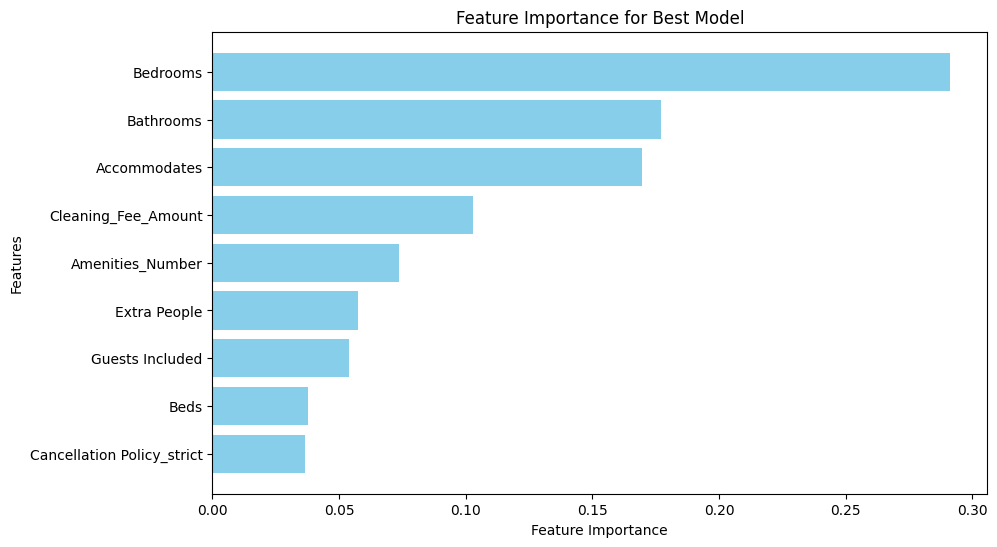

In [56]:
# VAMOS A VER LA DISTRIBUICION DE ERRORES
if hasattr(loaded_model, 'feature_importances_'):
    feature_importances = loaded_model.feature_importances_
    features_df = pd.DataFrame({
        'Feature': variables_with_corr,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance for Best Model')
    plt.gca().invert_yaxis()
    plt.show()

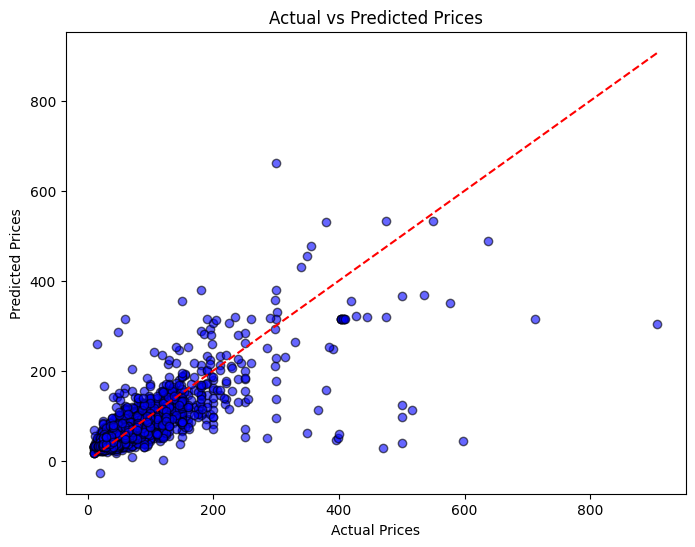

In [57]:
# VISUALIZAMOS LAS PREDICIONES
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

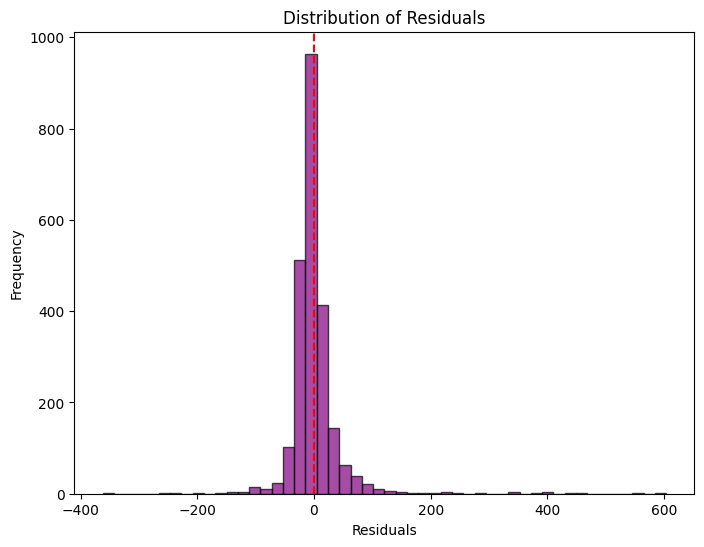

In [58]:
# Y POR ULTIMO VEMOS LOS ERRORES RESIDUALES
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

En el gráfico mostrado se observa cómo se reparten los errores de predicción. La mayoría se concentran en torno al valor cero, lo cual es positivo, ya que sugiere que los errores están equilibrados y no tienden hacia un lado concreto. Además, la forma de la distribución se asemeja a una normal, lo cual es deseable en modelos de regresión, ya que indica que los errores son aleatorios y no responden a ningún patrón definido.